## Practicum Modelling Exercises

The goal of these exercises is to teach you the use of _Python_ (and in particular *SciPy*) in the context of _Modelling and data analysis of chemical processes_, part of 6P4X0 Practicum Process Technology. These modeling exercises are meant to be taken after following the Python Crash Course. If you do have experience with programming in Python then you may find some exercises rather easy, so consider them as a refresher.


## Introduction to This Template Notebook

**How to use?**:
* Run the code cell by putting the cursor there and pressing **Control-Enter**.

* The locations where you should write your solutions can be recognized by the following comment.

* Double-clicking markdown cells will reveal their content. Press **Control-Enter** to make the cells user-friendly again. 

><code># WRITE YOUR CODE HERE</code>

**Make sure to clear your variables using <code>%reset -f</code> when you are done with an exercise and run it from top to bottom**

<hr style="border:2px solid #eee">


## Learning Objectives

After this lesson, you should

1. Be able to solve chemical reactions using ODEs
1. Be able to solve multiple tanks using ODEs
2. Be able to fit an algebraic equation to experimental data
3. Be able to fit parameters to complex models

## 1. Reaction modeling

The reaction is defined as followed: $$ S + E ↔ ES → P + E $$

This chemical reaction describes the substrate (S) reaction with enzyme (E) as an equilibrium reaction (forgive the lack of a proper equilibrium symbol). Thereafter, it forms the product (P) with a forward reaction. This reaction can be described with the following differential equations:


$$  \begin{aligned}
        &\frac{\mathrm{d}[S]}{\mathrm{d}t} &=& &-k_1[S][E] + k_{-1}[ES] \\
        &\frac{\mathrm{d}[E]}{\mathrm{d}t} &=& &-k_1[S][E] + k_{-1}[ES] + k_2[ES] \\
        &\frac{\mathrm{d}[ES]}{\mathrm{d}t} &=& &k_1[S][E] - k_{-1}[ES] - k_2[ES] \\
        &\frac{\mathrm{d}[P]}{\mathrm{d}t} &=& &k_2[ES]  \\
    \end{aligned}$$

The bracket items represent the concentrations. The rate constants are $k_1 = 0.5$ s<sup>-1</sup>, $k_{−1} = 0.1$ s<sup>-1</sup> and $k_2 = 0.3$ s<sup>−1</sup>. The initial conditions are $S(0) = 1.0$, $E(0) = 0.1$, $ES(0) = 0$ and $P(0) = 0$.

* Create a function that describes the ODE system in a separate script.

In [1]:
def substrate_react(t,c):
    S,E,ES,P = c
    
    # Define the rate constants
    k_1 = 0.5
    k_1_inv = 0.1
    k_2 = 0.3

    # Compute the time derivatives and store in dydt for output
    dSdt  = -k_1*S*E + k_1_inv*ES
    dEdt  = -k_1*S*E + k_1_inv*ES + k_2*ES
    dESdt =  k_1*S*E - k_1_inv*ES - k_2*ES
    dPdt  =  k_2*ES
    
    return [dSdt,dEdt, dESdt, dPdt]

* Solve the ODE system for a runtime of 200 seconds and plot the concentration
versus the time

Text(0, 0.5, 'Concentration')

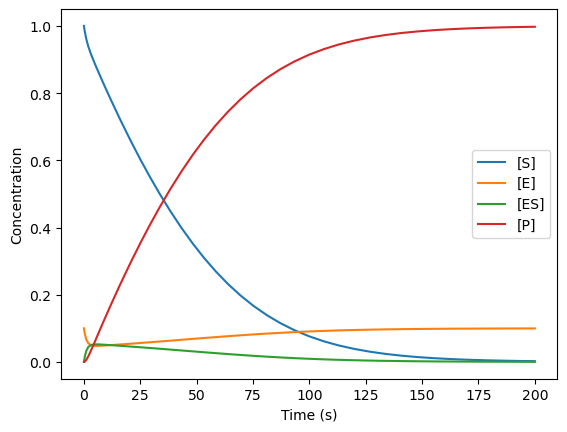

In [2]:
import matplotlib.pyplot as plt
import numpy as np
from scipy.integrate import solve_ivp

time_span = [0,200]
init_cond = [1.0, 0.1, 0.0, 0.0]
out = solve_ivp(substrate_react, time_span, init_cond)

for i in range(4):
    plt.plot(out.t, out.y[i])
plt.legend(['[S]','[E]','[ES]','[P]'])
plt.xlabel('Time (s)')
plt.ylabel('Concentration')

In [3]:
%reset -f

## 2. CSTR modeling

In a CSTR, reactants $A$ and $B$ are converted to $C$ as followed: $A + B → 2C$. This reaction can be described with the following differential equations:

$$  \begin{aligned}
        &\frac{\mathrm{d}c_A}{\mathrm{d}t} &=& &\frac{\phi_v}{V}\left(c_{A,in} - c_A\right) - R\\
        &\frac{\mathrm{d}c_B}{\mathrm{d}t} &=& &\frac{\phi_v}{V}\left(c_{B,in} - c_B\right) - R\\
        &\frac{\mathrm{d}c_C}{\mathrm{d}t} &=& &-\frac{\phi_v}{V}c_C + 2R\\
    \end{aligned}$$

Here, the reaction rate is defined as $$R = k c_A c_B$$

The following information is needed to solve this system: $\phi_v = 0.5$ L/s, $c_{A,in} = 0.5$ mol/L,$c_{B,in} = 0.8$ mol/L, $k = 0.1$ s<sup>−1</sup> and $V = 1.0$ L. Thereafter, the initial conditions are $c_A(0)= c_B(0) = c_C(0) = 0$ mol/L.

* Create a dictionary variable that contains the system parameters (e.g. $\phi_v$, $k$, etc).

In [4]:
params = {"phi_v": 0.5, "ca_in": 0.5, "cb_in": 0.8, "k": 0.1, "V": 1.0}

* Create a function that describes the ODE system in a separate script. Make sure that the dictionary is also given as an additional argument.

In [5]:
def cstr_react(t,c,params):
    cA,cB,cC = c
    
    dcdt = []
    # Define the rate constants
    phi_v = params["phi_v"]
    ca_in = params["ca_in"]
    cb_in = params["cb_in"]
    k = params["k"]
    V = params["V"]

    # Compute the time derivatives and store in dydt for output
    R = k*cA*cB
    dcdt.append(((phi_v/V) * (ca_in - cA)) - R)
    dcdt.append(((phi_v/V) * (cb_in - cB)) - R)
    dcdt.append(-(phi_v/V) * cC + 2*R)
    
    return dcdt

* Solve the ODE system for a runtime of 60 seconds and plot the concentration
versus the time

Text(0, 0.5, 'Concentration')

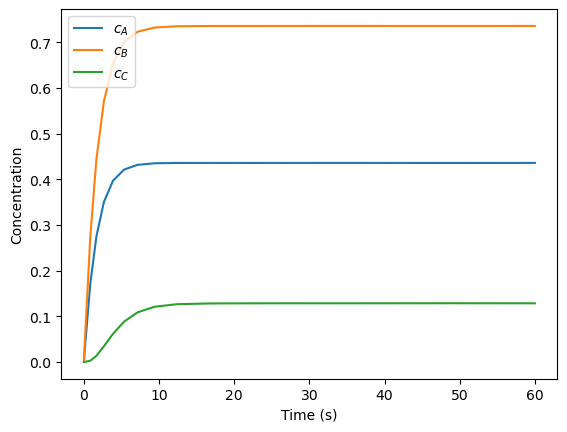

In [6]:
import matplotlib.pyplot as plt
import numpy as np
from scipy.integrate import solve_ivp

params = {"phi_v": 0.5, "ca_in": 0.5, "cb_in": 0.8, "k": 0.1, "V": 1.0}

time_span = [0,60]
init_cond = [0,0,0]
out = solve_ivp(cstr_react, time_span, init_cond, args=(params,))

for i in range(3):
    plt.plot(out.t, out.y[i])
plt.legend(['$c_A$','$c_B$','$c_C$'])
plt.xlabel('Time (s)')
plt.ylabel('Concentration')

>Make sure to clear your variables before moving on to the next question by running the following code block

In [7]:
%reset -f

# 3. Levels in tanks in series

The level of fluid in tank $i$, for a system that has $N$ tanks in series is given as:
$$A_i\frac{dh_i}{dt}=F_{i-1}-F_i \quad \mathrm{with} \quad F_i=K_i\sqrt{h_i}$$

Consider the following information: 
* $N = 5$
* $F_0 = 1.0$ m<sup>3</sup>/s
* $K_i = 0.8$
* $A_i = 1.2$
* Assume all tanks are empty at $t=0$. 

Note that we will make $K_i$ and $A_i$ tank-dependent later on, you might want to prepare for that. Also, the solver might cause h to become (a tiny bit) negative, causing the square root to fail. Create a workaround.

* Create the ODE function:

In [8]:
from math import sqrt
import numpy as np

def levels(t,h,par):
    K = par["K"]
    A = par["A"]
    N = par["N"]
    
    # Set h to zero when the solver makes it negative
    h = np.where(h <= 0, 0, h)
    # Defining the flow rates *out* of tanks 0-N
    F = [K[i]*sqrt(h[i]) for i in range(0,N)]
    # Initial tank uses static inflow variable F0
    tank0 = (par["F0"] - K[0]*sqrt(h[0]))/A[0]
    # Subsequent tanks are defined in one go
    tank1_N = [(F[i-1] - F[i])/A[i] for i in range(1,N)]
    # Return dhdt of all tanks
    dhdt = [tank0] + tank1_N
    return dhdt

1. Solve the ODE system and plot the results for all tanks for $t = 0$ to $t = 25$.
1. (Afterwards) Experiment with setting $K_i$ and $A_i$ to different values for each tank. Also try to increase the number of tanks to 25

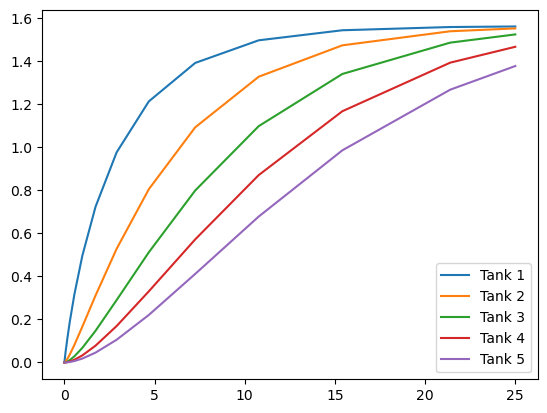

In [9]:
import matplotlib.pyplot as plt
from scipy.integrate import solve_ivp
N = 5
F0 = 1.0

par = {"N": N, "F0": F0}
par["K"] = [0.8]*N
par["A"] = [1.2]*N

out = solve_ivp(levels,[0,25], [0]*N, args=(par,))
for i in range(N):
    plt.plot(out.t, out.y[i],label=f'Tank {i+1}')
plt.legend()
plt.show()

>Make sure to clear your variables before moving on to the next question by running the following code block

In [10]:
%reset -f

# 4. Curve fitting (algebraic equation)
The dataset <code>arrhenius.npy</code> can be imported using the <code><a style="text-decoration: none;" title="numpy.load(file, mmap_mode=None, allow_pickle=False, fix_imports=True, encoding='ASCII', *, max_header_size=10000)" href="https://numpy.org/doc/stable/reference/generated/numpy.load.html">numpy.load</a></code> function, and contains experimentally measured reaction rate constants as function of temperature (two rows; first $T$, then $k$). These measurements follow the Arrhenius equation:

$$k = k_0 \mathrm{exp}\left(−\frac{E_A}{RT}\right)$$

Here, $k$ is given in s<sup>−1</sup>, and $T$ is given in K.

* Determine $k_0$ (in s<sup>−1</sup>) and $E_A$ (in J mol<sup>−1</sup>), and graphically show the goodness of fit.

k0=3.8406e+07, Ea=5.2834e+04


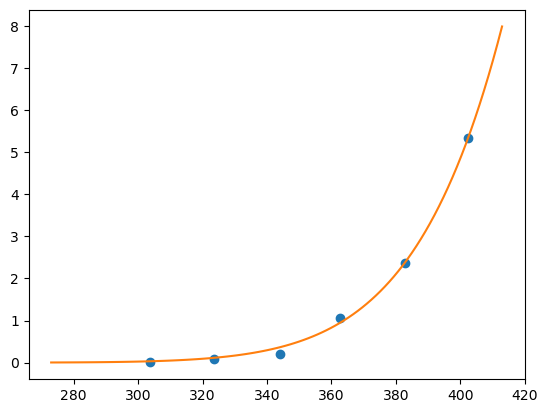

In [11]:
from scipy.constants import gas_constant as R
from scipy.optimize import curve_fit
import numpy as np
import matplotlib.pyplot as plt
# Create the model Arrhenius equation
def model(T,k0,EA):
    return k0*np.exp(-EA/(R*T))

# Load the data
T,k = np.load('arrhenius.npy')

# Fit the parameters k0 and Ea to the model 
(k0,Ea),_ = curve_fit(model, T, k, p0=[1,1])

print(f'{k0=:1.4e}, {Ea=:1.4e}')

# Create a full Temperature range for model plot
Tfull = np.linspace(273,413,101)
kfit = model(Tfull,k0,Ea)

# Plot results and data
plt.plot(T,k,'o')
plt.plot(Tfull,kfit, '-')

>Make sure to clear your variables before moving on to the next question by running the following code block

In [12]:
%reset -f

# 5. Curve fitting (algebraic equation)
The dataset <code>batch.txt</code> can be imported using the [<code><a style="text-decoration: none;" title="numpy.loadtxt(fname, dtype=<class 'float'>, comments='#', delimiter=None, converters=None, skiprows=0, usecols=None, unpack=False, ndmin=0, encoding='bytes', max_rows=None, *, quotechar=None, like=None)" href="https://numpy.org/doc/stable/reference/generated/numpy.loadtxt.html">numpy.loadtxt</a></code>](https://numpy.org/doc/stable/reference/generated/numpy.loadtxt.html) function, and contains experimentally measured concentration data of three components A, B, and C (in mol m<sup>−3</sup>) in an isothermal batch reactor ($V = 1$ m<sup>3</sup>), as a function of time (given in s). Open the file in an editor to understand how the data is organized. 

Consider the following first-order reactions:

$$  \begin{aligned}
        &A \overset{k_1}{\longrightarrow} B \\
        &B \overset{k_2}{\longrightarrow} C \\
    \end{aligned}$$

At $t = 0$, $C_A = 1$ mol m<sup>−3</sup>, and the other concentrations are zero. The goal is to determine the two reaction rate constants k1 and k2.

* Start by importing the data file. Use the documentation of the [<code><a style="text-decoration: none;" title="numpy.loadtxt(fname, dtype=<class 'float'>, comments='#', delimiter=None, converters=None, skiprows=0, usecols=None, unpack=False, ndmin=0, encoding='bytes', max_rows=None, *, quotechar=None, like=None)" href="https://numpy.org/doc/stable/reference/generated/numpy.loadtxt.html">numpy.loadtxt</a></code>](https://numpy.org/doc/stable/reference/generated/numpy.loadtxt.html) function to omit the initial header and choose the right delimiter.

In [13]:
import numpy as np

expdata = np.loadtxt('batch.txt',skiprows=1,delimiter=',')
print(expdata)

# optional separate the variables
t = expdata[:,0]
CA = expdata[:,1]
CB = expdata[:,2]
CC = expdata[:,3]

[[0.0000e+00 1.0000e+00 0.0000e+00 3.1858e-03]
 [1.9400e+00 9.0538e-01 1.1042e-01 1.6130e-02]
 [4.0800e+00 8.1748e-01 1.7034e-01 5.2425e-02]
 [6.0400e+00 7.7460e-01 2.2074e-01 5.2846e-03]
 [8.1000e+00 6.8961e-01 3.0489e-01 1.1748e-02]
 [9.9900e+00 5.9853e-01 3.3052e-01 8.7119e-02]
 [1.2020e+01 5.3317e-01 3.6683e-01 6.4012e-02]
 [1.4060e+01 5.0984e-01 4.2153e-01 1.1167e-01]
 [1.6020e+01 4.8091e-01 4.1014e-01 1.0724e-01]
 [1.8030e+01 3.9440e-01 4.3466e-01 1.3972e-01]
 [1.9910e+01 3.6493e-01 4.6353e-01 1.3500e-01]
 [2.1950e+01 3.2570e-01 4.6326e-01 2.1735e-01]
 [2.3910e+01 2.9345e-01 4.7241e-01 2.1932e-01]
 [2.6050e+01 2.7530e-01 4.6166e-01 2.4746e-01]
 [2.7980e+01 2.5918e-01 4.3171e-01 2.7289e-01]
 [3.0030e+01 2.0942e-01 4.7582e-01 3.0686e-01]
 [3.1960e+01 2.1394e-01 4.3521e-01 2.9911e-01]
 [3.3940e+01 1.8610e-01 4.0295e-01 3.5523e-01]
 [3.5910e+01 1.4307e-01 4.3176e-01 4.0313e-01]
 [3.7990e+01 1.1835e-01 4.1002e-01 4.4014e-01]
 [4.0090e+01 1.2504e-01 4.4785e-01 4.3957e-01]
 [4.1920e+01 

* Set up the loss function

In [14]:
from scipy.integrate import solve_ivp

def batch_loss(k,expdata,init):
    # Get the time span from the experimental time range
    tspan = [min(expdata[:,0]), max(expdata[:,0])]
    
    # Solve the ODE model based on a guess value k
    ode_out = solve_ivp(batch_model, tspan, init, t_eval=expdata[:,0], args=(k,))
    
    # Compute the loss (model - expdata). 
    # We need to transpose the expdata to get the same shape as the ODE output
    loss = ode_out.y - expdata[:,1:].T
    
    # The least_squares method requires us to make a single array of the loss
    return loss.flatten()

* Set up the ODE model function

In [15]:
def batch_model(t,c,k):
    k1,k2 = k
    CA,CB,CC = c
    dcdt = np.zeros(3)
    dcdt[0] = -k1*CA
    dcdt[1] =  k1*CA - k2*CB
    dcdt[2] =  k2*CB
    
    return dcdt

* Determine the reaction rate constants $k_1$ and $k_2$ and plot the model and experimental data in a single graph.

k1=0.04977, k2=0.0302


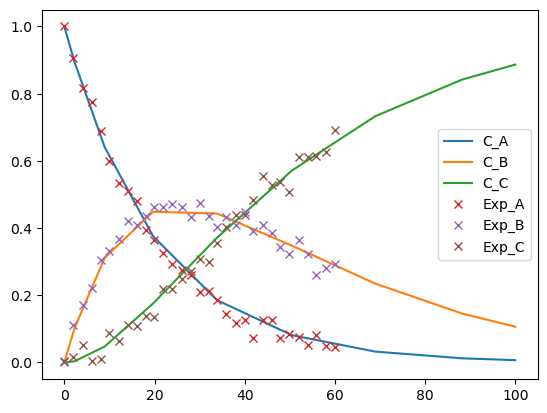

In [16]:
import numpy as np
from scipy.integrate import solve_ivp
from scipy.optimize import least_squares
import matplotlib.pyplot as plt

# Fit the kinetic rate parameters
init = [1,0,0]
outfit = least_squares(batch_loss,[1,2],args=(expdata,init,))
k1,k2 = outfit.x
print(f'{k1=:1.4}, {k2=:1.4}')

# For the plot, we need to run the model once more (with the fitted coeffs)
ode_out = solve_ivp(batch_model, [0, 100], init, args=(outfit.x,))

# We can plot all lines and expdata at once. For the ode output, we need to transpose to columns first.
plt.plot(ode_out.t, ode_out.y.T,label=['C_A','C_B','C_C'])
plt.plot(expdata[:,0], expdata[:,1:], 'x',label=['Exp_A','Exp_B','Exp_C'])
    
plt.legend()

>Make sure to clear your variables before moving on to the next question by running the following code block

In [17]:
%reset -f